# LSTM Model (JP Morgan Chase)

Disclaimer:

The information and tools provided in this resource are intended for educational purposes only and should not be used for making real-world decisions.

While LSTM (Long Short-Term Memory) networks are powerful deep learning models for sequential data, they have limitations and may not accurately predict future outcomes in all cases.

It is crucial to consult with experts and consider additional factors before making any decisions based on LSTM models.

#### Step 1: Download and preprocess data

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

# Step 1: Download and preprocess data
ticker = "JPM"
data = yf.download(ticker, start="2020-01-01", end="2024-01-01")
data = data['Close']
data = data.resample('D').mean()  # Resample to daily frequency
data.fillna(method='ffill', inplace=True)

[*********************100%***********************]  1 of 1 completed
<ipython-input-1-c0f484b89883>:15: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


#### Step 2: Normalize the data

In [ ]:
# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))


#### Step 3: Create sequences for LSTM

In [ ]:
# Step 3: Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Using 60 days to predict the next day
X, y = create_sequences(data_scaled, time_step)

#### Step 4: Reshape data to fit LSTM input requirements

In [ ]:
# Step 4: Reshape data to fit LSTM input requirements
X = X.reshape(X.shape[0], X.shape[1], 1)

#### Step 5: Split data into training and testing sets (80% train, 20% test)


In [ ]:
# Step 5: Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

#### Step 6: Build the LSTM model


In [ ]:
# Step 6: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Step 7: Compile the model


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


#### Step 8: Train the model



In [ ]:
# Step 8: Train the model
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 127ms/step - loss: 0.1605
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - loss: 0.0138
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0056
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0035
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0030
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0028
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0028
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.0029
Epoch 9/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0027
Epoch 10/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - loss: 0.0027


#### Step 9: Make predictions

In [ ]:
# Step 9: Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


#### Step 10: Inverse transform the predictions to the original scale

In [ ]:
# Step 10: Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform([y_train])
y_test_inv = scaler.inverse_transform([y_test])


#### Step 11: Calculate RMSE for model evaluation

In [ ]:
# Step 11: Calculate RMSE for model evaluation
train_rmse = np.sqrt(mean_squared_error(y_train_inv[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:, 0]))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 4.623168488471033
Test RMSE: 3.377243815261197


#### Step 12: Prepare the Data for plotting

In [ ]:
# Step 12: Prepare the data for plotting
train_plot = np.empty_like(data_scaled)
train_plot[:, :] = np.nan
train_plot[time_step:train_size+time_step, :] = train_predict  # Assign train predictions

test_plot = np.empty_like(data_scaled)
test_plot[:, :] = np.nan
test_plot[train_size + time_step:train_size + time_step + len(test_predict), :] = test_predict  # Assign test predictions


### Visualization

#### Step 13: Plot the results

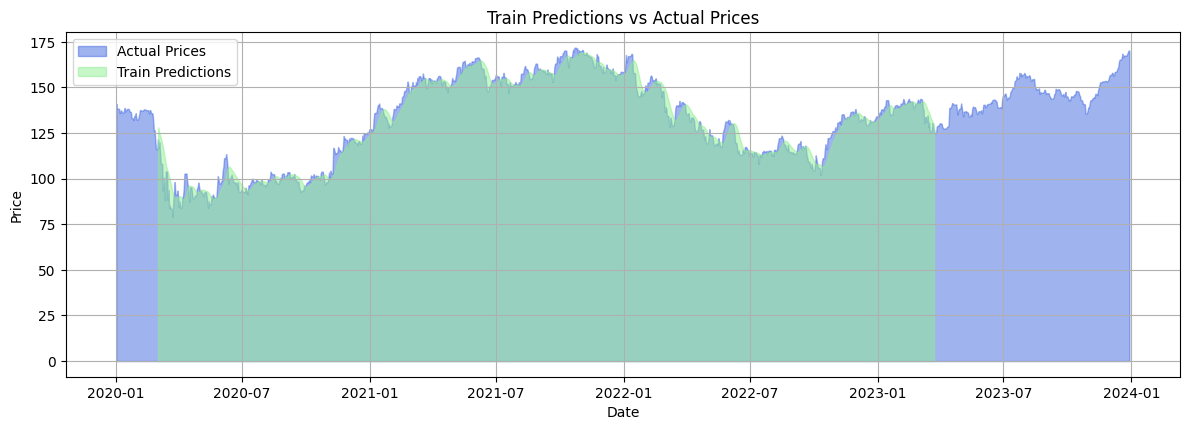

In [ ]:
# Training Data and Predictions
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.fill_between(data.index, scaler.inverse_transform(data_scaled).flatten(), color='royalblue', alpha=0.5, label='Actual Prices')

plt.fill_between(data.index, train_plot.flatten(), color='lightgreen', alpha=0.5, label='Train Predictions')

plt.title('Train Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')  # Move the legend to the upper left
plt.grid()
plt.tight_layout()
plt.show()

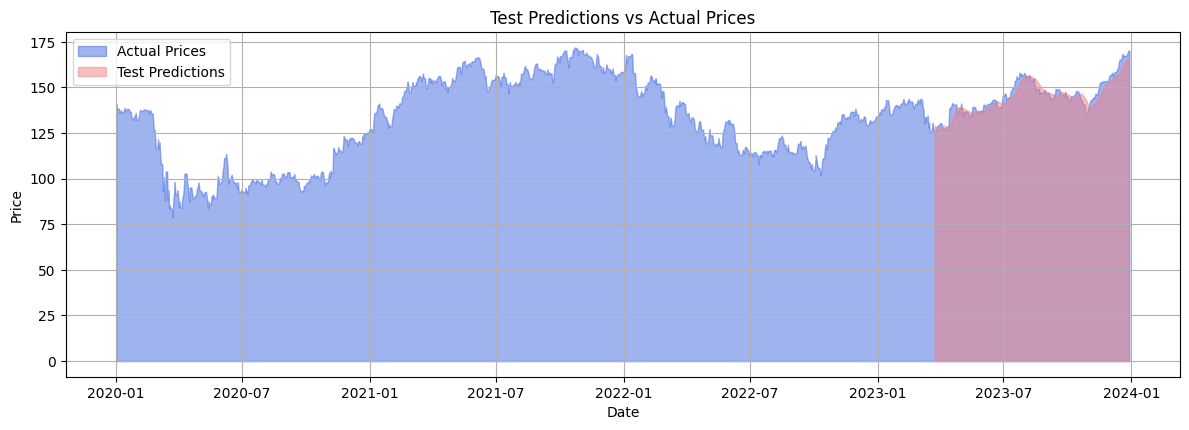

In [ ]:



# Test Data and Predictions
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.fill_between(data.index, scaler.inverse_transform(data_scaled).flatten(), color='royalblue', alpha=0.5, label='Actual Prices')
plt.fill_between(data.index, test_plot.flatten(), color='lightcoral', alpha=0.5, label='Test Predictions')
plt.title('Test Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')  # Move the legend to the upper left
plt.grid()
plt.tight_layout()
plt.show()


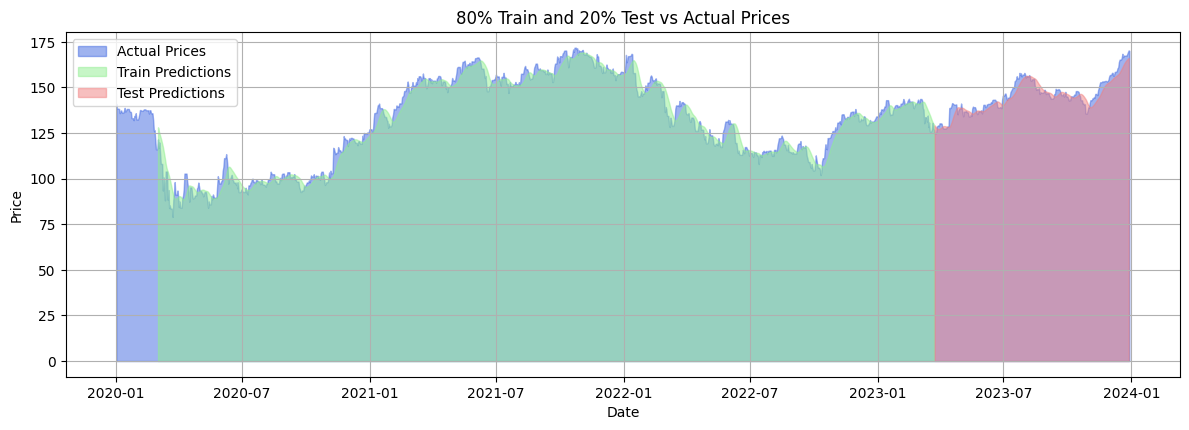

In [ ]:
# Assuming 'data' is your DataFrame and 'data_scaled' is your scaled data
plt.figure(figsize=(12, 8))

# Area plot for Train and Test Data and Predictions
plt.subplot(2, 1, 1)
plt.fill_between(data.index, scaler.inverse_transform(data_scaled).flatten(), color='royalblue', alpha=0.5, label='Actual Prices')
plt.fill_between(data.index, train_plot.flatten(), color='lightgreen', alpha=0.5, label='Train Predictions')
plt.fill_between(data.index, test_plot.flatten(), color='lightcoral', alpha=0.5, label='Test Predictions')

plt.title('80% Train and 20% Test vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')  # Move the legend to the upper left
plt.grid()
plt.tight_layout()
plt.show()